# Exploratory Analysis

* $RQ_1$: How does temporal proximity affect sharing behaviour during protest demonstrations?
* $RQ_2$: How do source attributes like the poster's gender affect sharing behaviour during protest demonstrations?
* $RQ_3$: Is there evidence of a "backfire effect" where misleading posts that *don't* have a credibility indicator are assumed to be true and more likely to be reshared.

In [6]:
library(lme4)
library(e1071) 
library(effects)
library(parameters)

data <- read.csv("../../data/processed/60b37265a9f60881975de69e-rumour-results.csv")
data$reshared <- as.integer(as.logical(data$reshared))
data$code = relevel(as.factor(data$code), ref = "neutral") 
data$evidence = relevel(as.factor(data$evidence), ref = "high") 
data$misleading = relevel(as.factor(data$misleading), ref = "False") 

head(data)

,user_id,condition,timeSubmitted,secondsTaken,id,rumour,code,evidence,warning,reshared,clickedWarning,timestamp,posterGender,posterId,misleading,warned,untagged
,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>,<fct>,<fct>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<fct>,<chr>,<chr>
1,3.634427e+18,treatment,2021-06-03 09:50:15.953000+00:00,120,1.283849e+18,R1,neutral,high,False,0,False,3,male,RnJlZGVyaWNrIFdvb2RodHRwczovL3JhbmRvbXVzZXIubWUvYXBpL3BvcnRyYWl0cy90aHVtYi9tZW4vMTkuanBn,False,False,True
2,3.634427e+18,treatment,2021-06-03 09:50:15.953000+00:00,120,1.283767e+18,R1,neutral,high,False,0,False,4,female,S2F0aWUgTXVycGh5aHR0cHM6Ly9yYW5kb211c2VyLm1lL2FwaS9wb3J0cmFpdHMvdGh1bWIvd29tZW4vNjQuanBn,False,False,True
3,3.634427e+18,treatment,2021-06-03 09:50:15.953000+00:00,120,1.283508e+18,R1,denies,high,True,0,False,11,male,R2FyeSBIb3BraW5zaHR0cHM6Ly9yYW5kb211c2VyLm1lL2FwaS9wb3J0cmFpdHMvdGh1bWIvbWVuLzc4LmpwZw==,True,True,False
4,3.634427e+18,treatment,2021-06-03 09:50:15.953000+00:00,120,1.283371e+18,R1,affirms,high,False,0,False,11,female,V2lsbGllIENsYXJraHR0cHM6Ly9yYW5kb211c2VyLm1lL2FwaS9wb3J0cmFpdHMvdGh1bWIvd29tZW4vNy5qcGc=,False,False,True
5,3.634427e+18,treatment,2021-06-03 09:50:15.953000+00:00,120,1.283538e+18,R1,affirms,high,False,1,False,13,female,TWVsaW5kYSBCYXJyZXR0aHR0cHM6Ly9yYW5kb211c2VyLm1lL2FwaS9wb3J0cmFpdHMvdGh1bWIvd29tZW4vNjIuanBn,False,False,True
6,3.634427e+18,treatment,2021-06-03 09:50:15.953000+00:00,120,1.283492e+18,R1,questions,high,False,1,False,14,male,TG9ubmllIE1pbGVzaHR0cHM6Ly9yYW5kb211c2VyLm1lL2FwaS9wb3J0cmFpdHMvdGh1bWIvbWVuLzEwLmpwZw==,False,False,True


### Binomial Logistic regression

Alt add an interaction between warning and evidence (if we expect there to be different effects for putting a cred indicator on a post denying a high evidence rumour vs affirming a low evidence rumour.

* $RQ_1$: How does temporal proximity affect sharing behaviour during protest demonstrations?
* $RQ_2$: How do source attributes like the poster's gender affect sharing behaviour during protest demonstrations?
* $RQ_3$: Is there evidence of a "backfire effect" where misleading posts that *don't* have a credibility indicator are assumed to be true and more likely to be reshared.

> Our outcome variable was the intent to share the article corresponding to a headline with friends on social media. Since the outcome variable is a binary choice between the intent to share or not share, we employed Binomial Logistic Regression (BLR). The BLR incorporated participant ID and headline ID as random effects to account for repeated measures for varying items [5, 68]. Our independent variables included the treatment, headline category, political affiliation, social media use, and common demographic factors, such as age and gender. (Yaqub)


What I write:

> The outcome variable was the decision to reshare a given post. Since the outcome variable is a binary choice between the choice to reshare or not reshare (56 observations per participant), I employed Binomial Logistic Regression (BLR). The BLR incorporated the participant ID and post ID (unique ID from the Twitter API) as random-effects to account for repeated measures for varying items. Whether the post is ``misleading,'' defined as affirming the low evidence rumour or denying the high evidence rumour, the ''source gender'' (male vs. female profile image), and timestamp randomly assigned to each post are included as fixed-effects. Similar to Pennycook (implied truth), the control condition is used as the baseline and tests for a warning effect (or, potentially, a backfire effect if the warning hurts rather than helps) with a Warned dummy that indicates the post being in the warning treatment and having a warning, and tests for an implied truth effect with an Untagged dummy that indicates a post being in the warning treatment and not having a warning.

In [7]:
md <- glmer(reshared ~ posterGender + timestamp + warned + untagged * misleading + (1 | user_id) + (1 | id),
            data = data,
            family = binomial, 
            control=glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e5))
           )
summary(md)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
reshared ~ posterGender + timestamp + warned + untagged * misleading +  
    (1 | user_id) + (1 | id)
   Data: data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

     AIC      BIC   logLik deviance df.resid 
  4850.6   4910.9  -2416.3   4832.6     5983 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7197 -0.4317 -0.2716 -0.1499  9.7411 

Random effects:
 Groups  Name        Variance Std.Dev.
 id      (Intercept) 0.7933   0.8907  
 user_id (Intercept) 1.0297   1.0148  
Number of obs: 5992, groups:  id, 167; user_id, 109

Fixed effects:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -1.131180   0.195440  -5.788 7.13e-09 ***
posterGendermale             0.011095   0.076338   0.145   0.8844    
timestamp                   -0.023418   0.002309 -10.140  < 2e-16 **

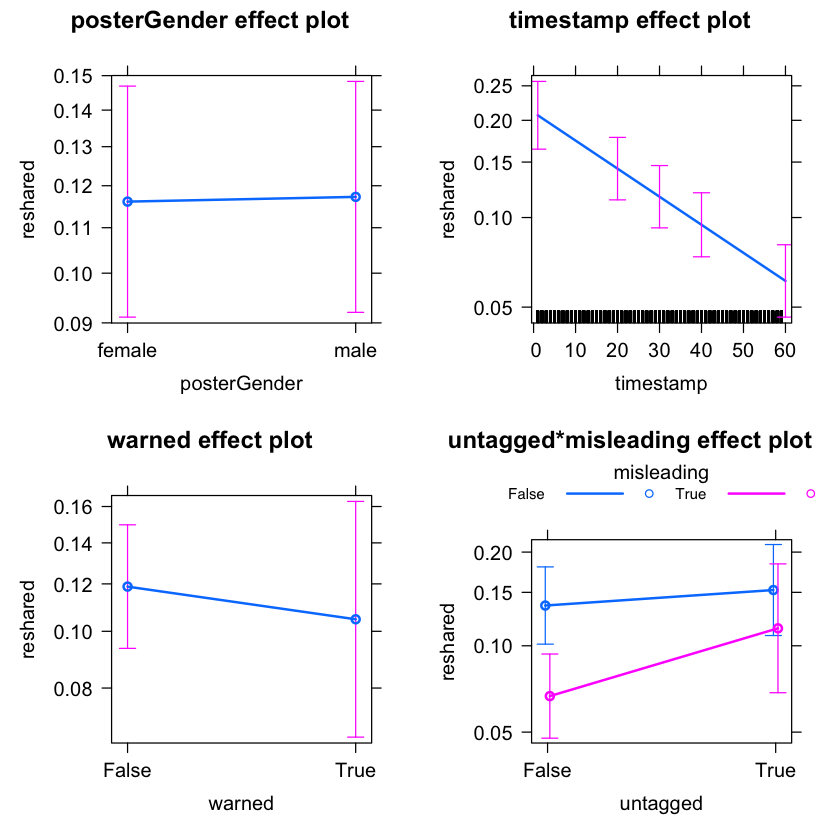

In [8]:
plot(allEffects(md), multiline=TRUE, ci.style="bars")